In [1]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *

from time import time
from tqdm import tqdm

In [2]:
scenario = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

models_IGMF = [  ## test with limited set of IGMF models
    'alpha1-3rd',
    'alpha3-3rd',
    'alpha9-3rd',
]


scenario0 = {
    'IGM' : ['alpha3-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}
scenario1 = {
    'IGM' : ['alpha1-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}
scenario9 = {
    'IGM' : ['alpha9-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}
scenario_IGM = {
    'IGM' : ['alpha1-3rd'],
}

scenario_tmp = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario1_ = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
#    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}



In [3]:
from PreFRBLE.sample import FakeFRBs

telescope = 'Parkes'
population = 'SMD'
#telescope = 'None'
#population = 'flat'

t0 = time()

### produce fake data
FRBs = FakeFRBs( N=50, measures=['DM','RM'], measureable=False, telescope=telescope, population=population, **scenario_IGM )

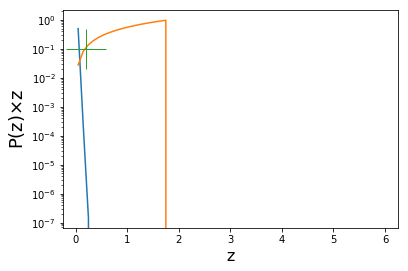

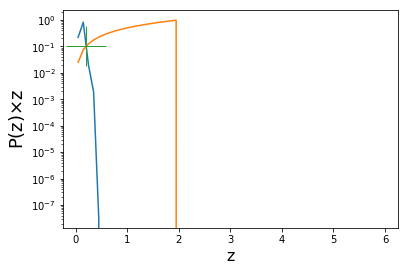

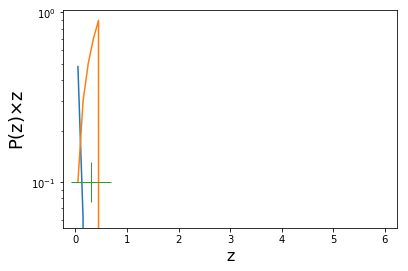

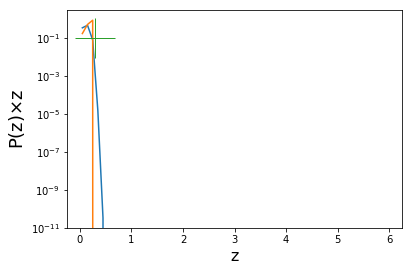

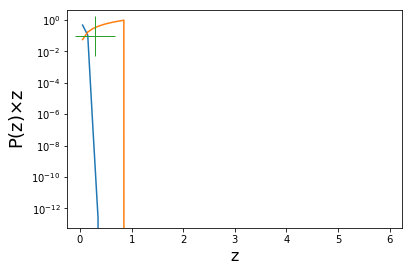

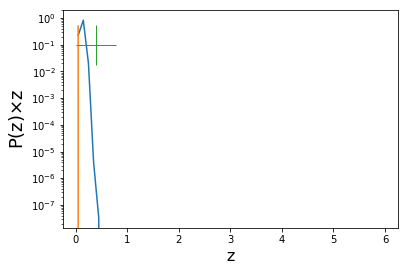

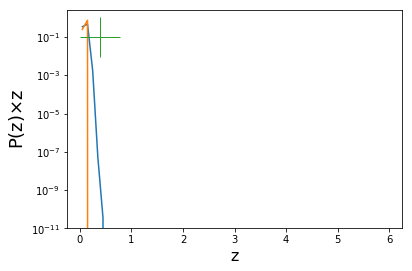

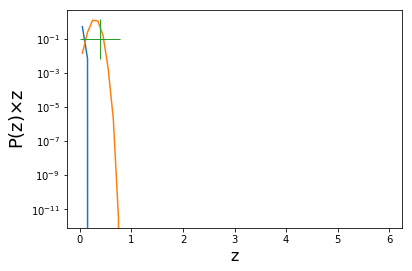

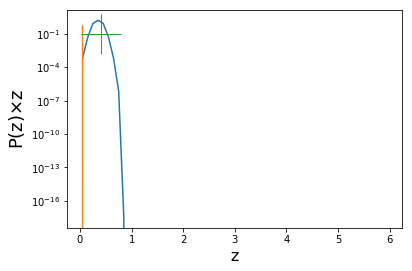

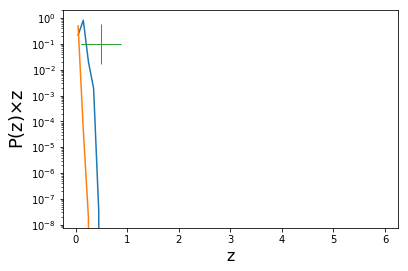

In [22]:
Ps, zs = LikelihoodRedshift(  DMs=FRBs['DM'], scenario=scenario0, population=population, telescope=telescope)
Ps_flat, zs = LikelihoodRedshift(  DMs=FRBs['DM'], scenario=scenario0, population='flat', telescope='None')
for P, P_flat, z in zip( Ps[10:20], Ps_flat, FRBs['redshift'] ):
    fig, ax = plt.subplots()
    PlotLikelihood( x=zs, P=P, measure='z',ax=ax )
    PlotLikelihood( x=zs, P=P_flat, measure='z', ax=ax )
    plt.xscale('linear')
    ax.plot( z, 1e-1, marker='+', markersize=40 )


estimated redshift evolution of average |RM|

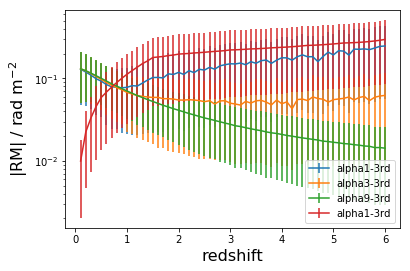

In [6]:
fig, ax = plt.subplots()
for scena in [scenario1, scenario0, scenario9, scenario_IGM]:
    PlotAverageEstimate( measure='RM', scenario=scena, ax=ax, label=scena['IGM'][0] )
plt.legend()

In [5]:
from PreFRBLE.sample import FakeFRBs

telescope = 'CHIME'
population = 'SMD'
#telescope = 'None'
#population = 'flat'

t0 = time()

### produce fake data
FRBs = FakeFRBs( N=500, measures=['DM','RM'], measureable=False, telescope=telescope, population=population, **scenario_IGM )

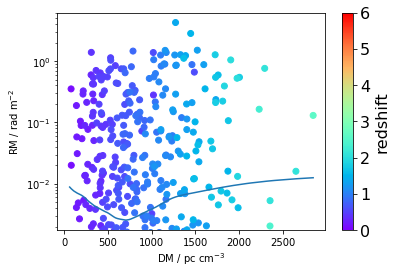

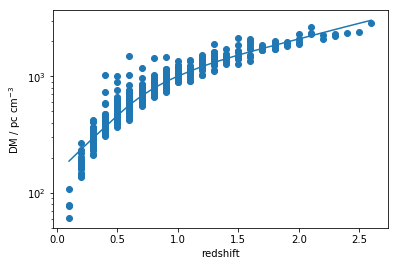

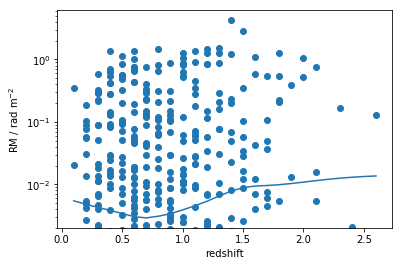

In [6]:
from statsmodels.nonparametric.smoothers_lowess import lowess

### scatter plot 
plt.scatter( FRBs['DM'], FRBs['RM'], c=Rainbow(FRBs['redshift'], min=0, max=6), cmap=rainbow )
Colorbar(x=redshift_range, label='redshift')

a = lowess( np.log10(FRBs['RM']), np.log10(FRBs['DM']) )
plt.plot( 10.**a[:,0], 10.**a[:,1])


plt.yscale('log')
plt.xlabel( r"DM / %s" % units['DM'])
plt.ylabel( r"RM / %s" % units['RM'])
plt.show()

plt.scatter( FRBs['redshift'], FRBs['DM'], cmap=rainbow )

a = lowess( np.log10(FRBs['DM']), FRBs['redshift'])
plt.plot(a[:,0], 10.**a[:,1])

plt.yscale('log')
plt.xlabel( r"redshift")
plt.ylabel( r"DM / %s" % units['DM'])
plt.show()

plt.scatter( FRBs['redshift'], FRBs['RM'], cmap=rainbow )

a = lowess( np.log10(FRBs['RM']), FRBs['redshift'])
plt.plot(a[:,0], 10.**a[:,1])

plt.yscale('log')
plt.xlabel( r"redshift")
plt.ylabel( r"RM / %s" % units['RM'])
plt.show()

alpha1-3rd
alpha3-3rd
alpha9-3rd


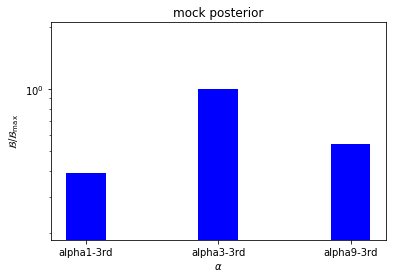

In [7]:
### compute Bayes factor
Bs = []
#for model in models_IGM[3:]:
for model in models_IGMF:
    print( model )
    scenario_tmp = scenario0.copy()
    scenario_tmp = scenario_IGM.copy()
    scenario_tmp['IGM'] = [model]
    Bs.append( BayesFactorCombined( DMs=FRBs['DM'], RMs=FRBs['RM'], scenario1=scenario_tmp, scenario2=scenario_IGM, population=population, telescope=telescope ) )
Bs = np.array( Bs )
    
### Plot
PlotBayes( x=models_IGMF,  y=Bs, label=r"$\alpha$", title='mock posterior', width=0.3 )


0.3649774146221924


(0.19104382079046484, 2.093760469953731)

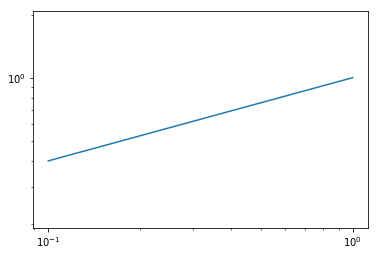

In [46]:
fig, ax = plt.subplots()


ax.loglog([0.1,1],[0.4,1])

lim = ax.get_ylim()
w = lim[0]/lim[1]
print(w)
#if w >0.6 :
ax.set_ylim(lim[0]*0.5, lim[1]*2)



compute likelihood of measure in full scenario for individual source redshifts. Takes a long time to compute all the convolutions. Results are saved to likelihood_file_Full and loaded faster later on.

In [4]:

ComputeFullLikelihood( scenario=scenario, models_IGMF=models_IGMF, N_processes=3)

alpha1-3rd 0.2
alpha1-3rd 1.2000000000000002
alpha1-3rd 0.2
alpha1-3rd 1.2000000000000002
alpha1-3rd 0.7000000000000001
alpha1-3rd 0.7000000000000001


Process ForkPoolWorker-9:
Traceback (most recent call last):
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.4/multiprocessing/pool.py", line 119, i

KeyboardInterrupt: 

alpha1-3rd 3.1
alpha1-3rd 3.1
alpha1-3rd 3.2
alpha1-3rd 3.2


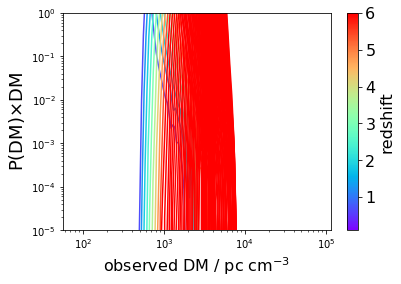

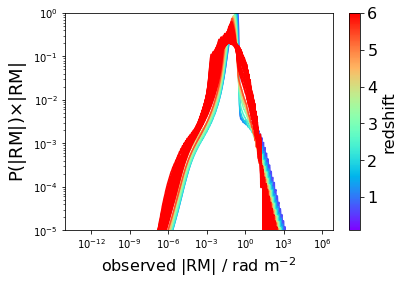

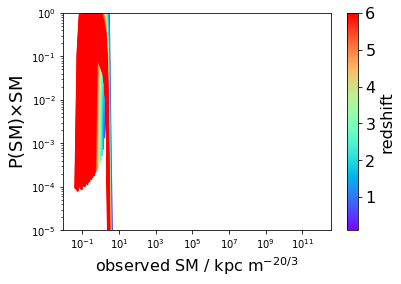

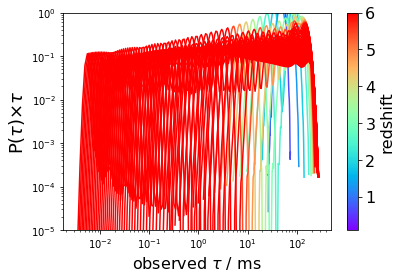

In [3]:
for measure in measures:
    PlotLikelihoodEvolution( measure=measure,  scenario=scenario0)
    plt.ylim(1e-5,1)

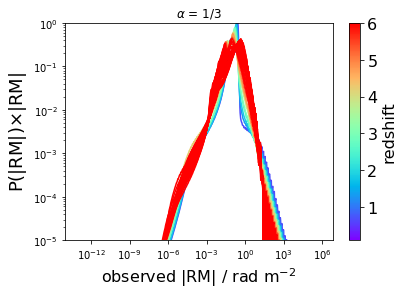

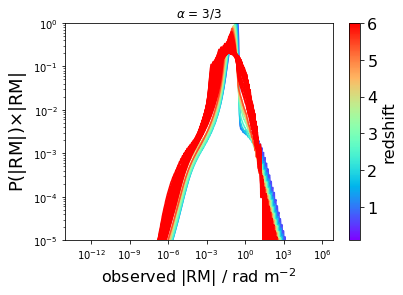

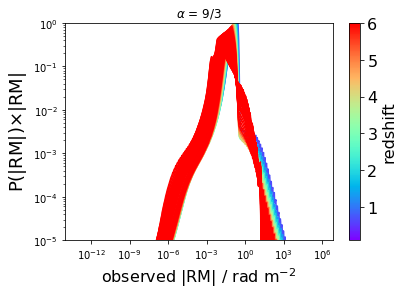

In [6]:
for ia, a in enumerate([1,3,9]):
    tmp = scenario_IGM.copy()
    tmp = scenario9.copy()
    tmp['IGM'] = ['alpha%i-3rd' % a]
    PlotLikelihoodEvolution( measure='RM', scenario=tmp, measureable=False )
    plt.title( labels[tmp['IGM'][0]] )
    plt.ylim(1e-5,1)

compute likelihood of model contribution as observed by telescope

<Figure size 432x288 with 0 Axes>

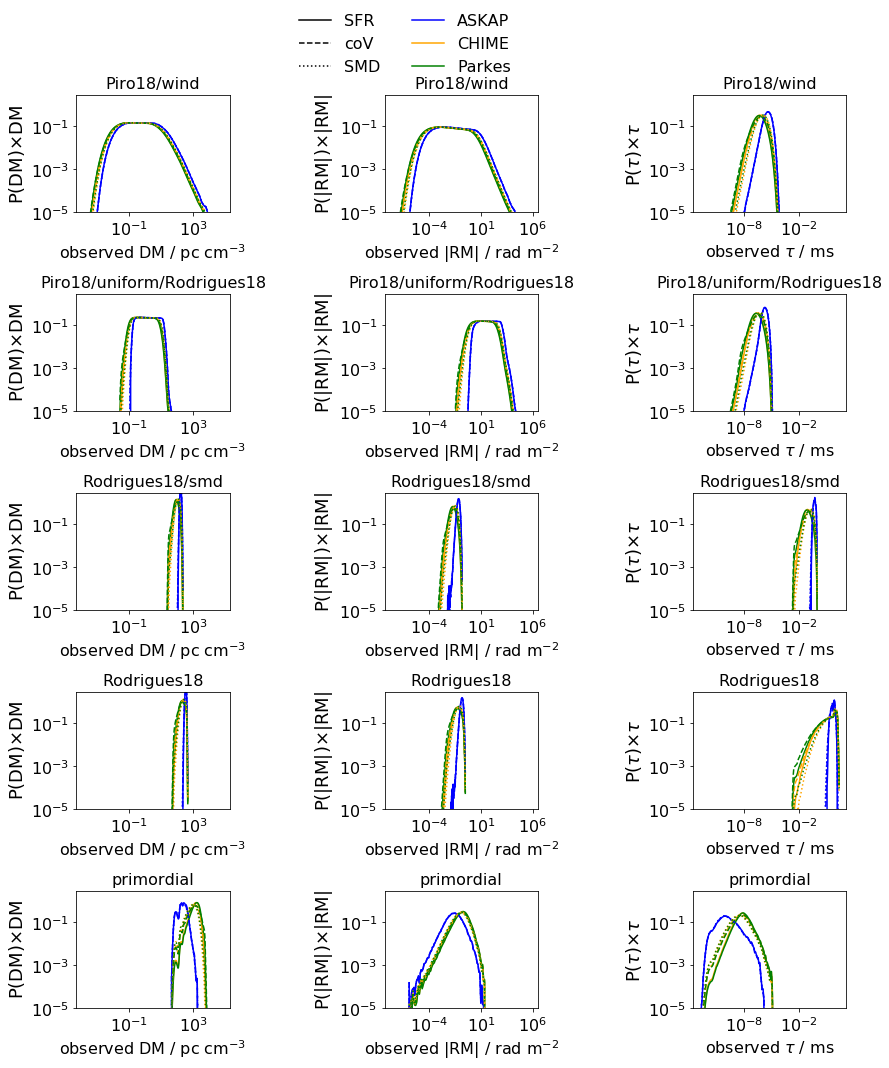

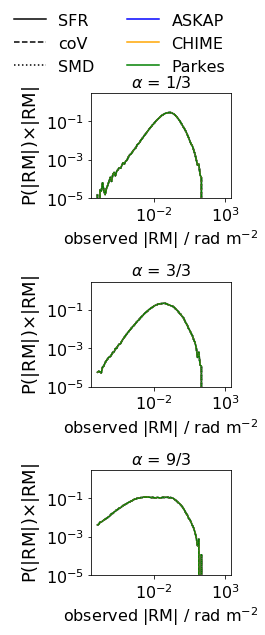

In [3]:
## what should be plotted?
measures = ['DM', 'RM', 'tau']
#telescopes = ['chime','askap-fly','parkes']
#populations = ['vol_co','smd','sfr']


## which models to plot?
models = [
    { 'Local':['Piro18/wind']},
    { 'Local':['Piro18/uniform/Rodrigues18']},
    { 'Host':['Rodrigues18/smd']},
    { 'Inter':['Rodrigues18']},
    { 'IGM' : ['primordial']},
]


## which IGM models to compare?
scenarios_IGMF = [
    { 'IGM' : ['alpha1-3rd']},
    { 'IGM' : ['alpha3-3rd']},
    { 'IGM' : ['alpha9-3rd']},
]

handles = []
for population, linestyle in zip( populations, linestyles_population ):
    handles.append( plt.plot( [0,1],[0,1], label=population, color='black', linestyle=linestyle )[0] )

for telescope, color in zip( telescopes, colors_telescope ):
    handles.append( plt.plot( [0,1],[0,1], label=telescope, color=color )[0] )

plt.legend()
plt.clf()

fig, axs = plt.subplots( len(models) , len(measures), figsize=(4*len(measures), 3*len(models) ), sharex='col', sharey='all' )

for i_m, model in enumerate( models ):
    for ax in axs[i_m]:
        ax.set_title( '/'.join( KeyFull( **model ).split('/')[:-3] ), fontsize=16 )
    for i_v, measure in enumerate( measures ):
        for population, linestyle in zip( populations, linestyles_population):
            for telescope, color in zip( telescopes, colors_telescope):
                PlotTelescope( measure=measure, population=population, telescope=telescope, ax=axs[i_m][i_v], scenario=model, linestyle=linestyle, color=color )

axs[0][0].set_ylim(1e-5,3)
axs[0][1].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()

fig, axs = plt.subplots( len( scenarios_IGMF ), 1, figsize=( 4,len( scenarios_IGMF )* 3 ), sharex='all', sharey='all' )

for i_m, model in enumerate( scenarios_IGMF ):
    axs[i_m].set_title( r"$\alpha$ = %s/3" % model['IGM'][0].split('-')[0][-1], fontsize=16 )
    for population, linestyle in zip( populations, linestyles_population ):
        for telescope, color in zip( telescopes, colors_telescope ):
            PlotTelescope( measure='RM', ax=axs[i_m], scenario=model, linestyle=linestyle, color=color  )

axs[0].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )
axs[0].set_ylim(1e-5,3)

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()




compuite likelihood of measure in full scenario as observed by telescope

this took 0.0 minutes


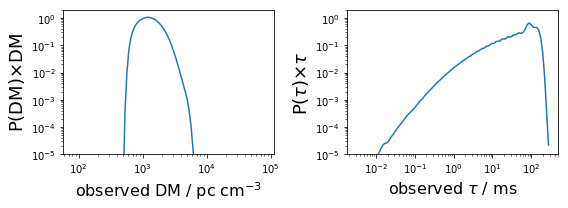

In [5]:
measures = ['DM', 'tau']
telescope = 'Parkes'
population = 'SMD'
fig, axs = plt.subplots( 1, len(measures), figsize=(4*len(measures),3) )

t0 = time()
for i_m, measure in enumerate( measures ):
    P, x = GetLikelihood_Telescope(measure=measure, telescope=telescope, population=population, **scenario )
    PlotLikelihood( x, P, measure=measure, ax=axs[i_m] )
for ax in axs:
    ax.set_ylim(1e-5,2)
plt.tight_layout()
print( "this took %.1f minutes" % ( (time()-t0)/60 ) )

<Figure size 432x288 with 0 Axes>

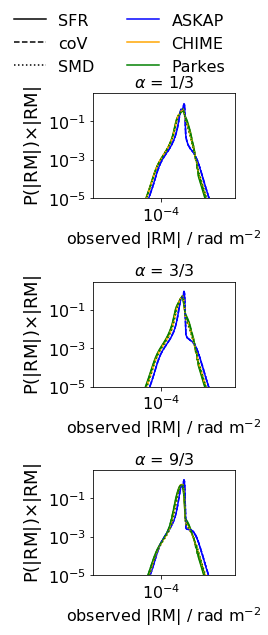

In [4]:

## which full scenarios to plot for IGMF?
alphas = np.array(models_IGM)[np.array([3,5,-1])]
scenarios = []
for alpha in alphas:
    scenario_tmp['IGM'] = [alpha]
    scenarios.append( scenario_tmp.copy() )
    

handles = []
for population, linestyle in zip( populations, linestyles_population ):
    handles.append( plt.plot( [0,1],[0,1], label=population, color='black', linestyle=linestyle )[0] )

for telescope, color in zip( telescopes, colors_telescope ):
    handles.append( plt.plot( [0,1],[0,1], label=telescope, color=color )[0] )

plt.legend()
plt.clf()
    
fig, axs = plt.subplots( len( scenarios ), 1, figsize=( 4,len( scenarios )* 3 ), sharex='all', sharey='all' )
for i_s, scenario in enumerate(scenarios):
#    axs[i_s].set_title( '/'.join( KeyFull( **scenario ).split('/')[:-3] ), fontsize=16 )
    axs[i_s].set_title( labels[scenario['IGM'][0]], fontsize=16 )
    for population, linestyle in zip( populations, linestyles_population):
        for telescope, color in zip( telescopes, colors_telescope):
            PlotTelescope( measure='RM', population=population, telescope=telescope, ax=axs[i_s], scenario=scenario, linestyle=linestyle, color=color )


axs[0].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )
axs[0].set_ylim(1e-5,3)

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()


compute redshift estimates

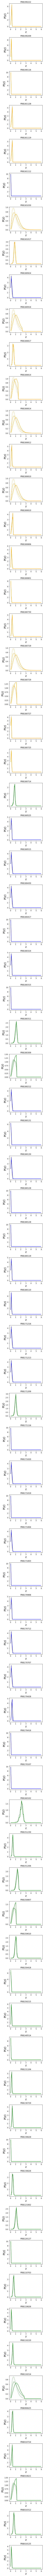

In [3]:
### first compare DM estimates assuming different cosmic population 
file_redshifts_DM = root+"results/table_redshifts_DM.tex"

FRBs = GetFRBcat(telescopes=telescopes)

N_FRBs = len(FRBs)
N_pop = len(populations)

fig, axs = plt.subplots( N_FRBs, 1, figsize=(4, 3*N_FRBs) )

z_estdev = np.zeros( [ N_FRBs, N_pop, 2 ] )-1  ## result array to contain estimate and deviation of redshift for each population  \\ and for population independent

for tele, color in zip( telescopes, colors_telescope):
    ## find FRBs observed by tele
    ix_tele, = np.where( FRBs['tele'] == telescopes_FRBcat[tele] )
    set = FRBs[ ix_tele ]
    for ipop, (pop, linestyle) in enumerate( zip( populations, linestyles_population ) ):
        Ps, z = LikelihoodRedshift( set['DM']-set['DM_gal'], scenario, telescope=tele, population=pop )
        for iP, P in enumerate(Ps):
            PlotLikelihood( z, P, measure='z', log=False, ax=axs[ix_tele[iP]], color=color, linestyle=linestyle )
            z_estdev[ix_tele[iP], ipop] = Likelihood2Expectation( P, z, log=False )

with open( file_redshifts_DM, 'w' ) as f:
    f.write( R"\begin{tabular}{l|c|c|c|c|c|c}" )
    f.write( "\n\t")
    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$ & $z_{\rm SMD}(\DM)$  & $z_{\rm SFR}(\DM)$ & $z_{\rm coV}(\DM)$ \\" )
#    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$ & $z_{\rm flat}(\DM)$  & $z_{\rm vol\_co}(\DM)$  & $z_{\rm smd}(\DM)$ & $z_{\rm sfr}(\DM)$ \\" )

    for frb, estdev in zip( FRBs, z_estdev ):
        if estdev[0][0] == -1:
            continue
        f.write( "\n\t")
        f.write( R"%s & %.1f & %.1f & $%.2f \pm %.2f$ & $%.2f \pm %.2f$ & $%.2f \pm %.2f$ \\" % ( frb['ID'], frb['DM'], frb['DM_gal'], estdev[0][0], estdev[0][1], estdev[1][0], estdev[1][1], estdev[2][0], estdev[2][1] ) )
    f.write( "\n")
    f.write( R"\end{tabular}" )
        
            
for ax, id in zip( axs, FRBs['ID'] ):
    ax.set_title( id )

    
plt.tight_layout()


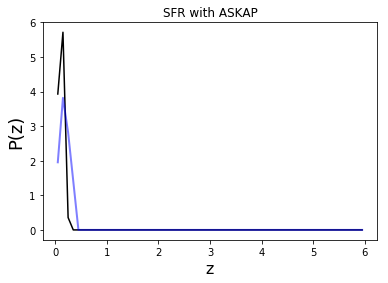

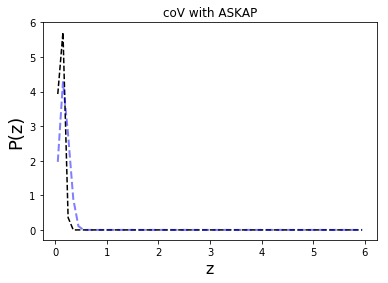

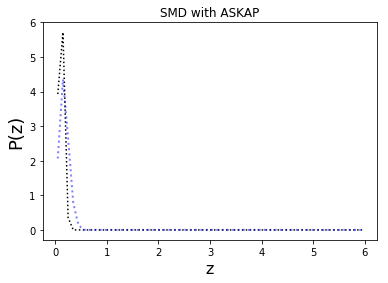

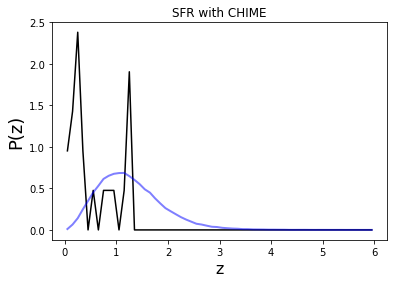

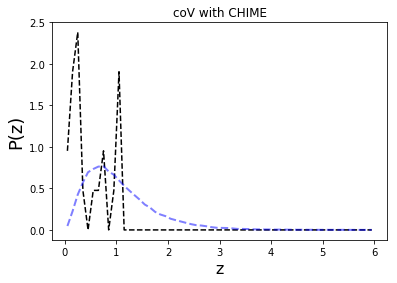

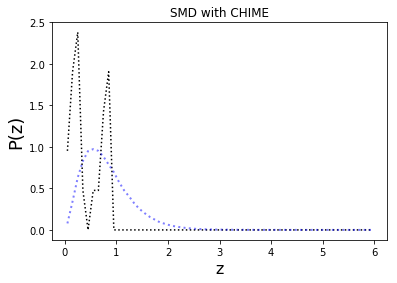

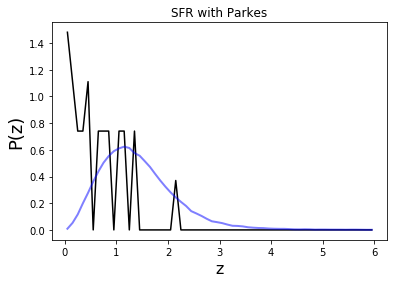

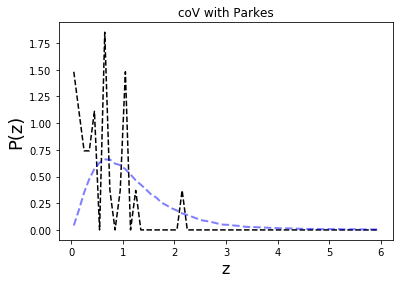

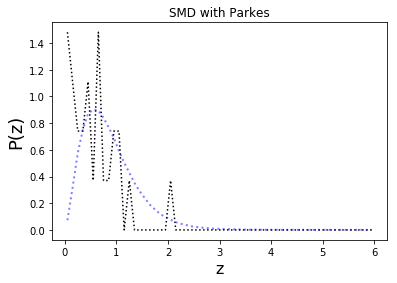

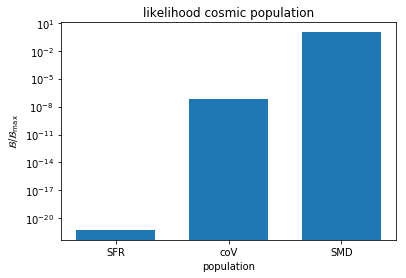

In [4]:
### see how well the obtained redshifts compare to assumed population
### compare shape of likelihood function and compute Bayes factor

likelihoods = np.zeros( [N_FRBs, N_pop] )

for tele in telescopes:
    ix_tele, = np.where( FRBs['tele'] == telescopes_FRBcat[tele] )
    for ipop, (pop, linestyle) in enumerate(zip(populations, linestyles_population)):
        fig, ax = plt.subplots()
        ax.set_title( "%s with %s" % (pop, tele) )
        P, x = histogram( z_estdev[ix_tele,ipop,0], bins=60, range=(0,6), log=False, density=True )
        PlotLikelihood( x=x, P=P, log=False, measure='z', ax=ax, linestyle=linestyle, label=pop, color='black' )
        P, x = GetLikelihood_Redshift( population=pop, telescope=tele )
        PlotLikelihood( x=x, P=P, log=False, measure='z', ax=ax, linestyle=linestyle, linewidth=2, alpha=0.5, color='blue' )
    
        likelihoods[ix_tele,ipop] = Likelihoods( measurements=z_estdev[ix_tele,ipop,0], P=P, x=x )

plt.show()

        
likelihoods /= likelihoods[:,0].repeat(N_pop).reshape(N_FRBs, N_pop)
bayes = np.prod( likelihoods, axis=0 )

PlotBayes( x=populations, y=bayes, width=0.7, label='population', title='likelihood cosmic population' )

plt.show()

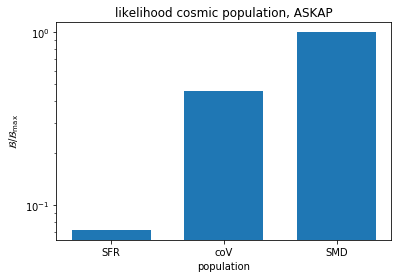

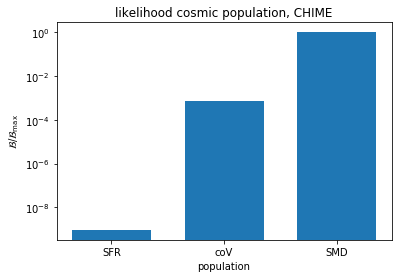

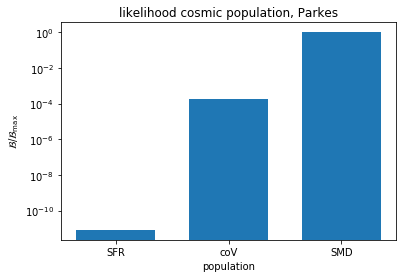

In [5]:
for tele in telescopes:
    ix_tele, = np.where( FRBs['tele'] == telescopes_FRBcat[tele] )
    bayes = np.prod( likelihoods[ix_tele], axis=0 )
    PlotBayes( x=populations, y=bayes, width=0.7, label='population', title='likelihood cosmic population, %s' % tele )

    plt.show()

In [ ]:
file_redshifts_DM_tau = root+"results/table_redshifts_DM_tau.tex"
    
### investigate how additional info from tau refines results


## file creation template
f = open( file_redshifts_DM_tau, 'w' )
    f.write( R"\begin{tabular}{l|c|c|c|c|c|c}" )
    f.write( "\n\t")
    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$ & $\tau$ / ms & $z_{\rm vol\_co}(\DM,\tau)$  & $z_{\rm smd}(\DM,\tau)$ & $z_{\rm sfr}(\DM,\tau)$ \\" )
    for i in [1,2]:
        f.write( "\n\t")
        f.write( R"FRB123456 & 1000 & 10 & 1 & $1.00 \pm 0.10$ & $1.00 \pm 0.10$ & $1.00 \pm 0.10$ \\" )
    f.write( "\n")
    f.write( R"\end{tabular}" )

perform fake-test of IGMF inference

Here we produce a fake population that mimics observations expected for one of the considered models of IGM. We compute the Bayes factor for each of these models, providing a likelihood function on $\alpha$, the exponent of the $|B| \propto \rho^\alpha$ relation.

alpha1-3rd
[  1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08]
[  1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.

alpha6-3rd
[  1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08]
[  1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.

/media/hqi/bc66589e-7bcd-4650-a007-acbd38d85bc9/virtualenv/crpropa/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


(1e-05, 2)

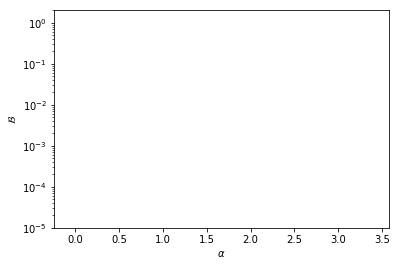

In [3]:
telescope = 'parkes'
population = 'smd'
telescope = 'None'
population = 'flat'

### produce fake data
FRBs = FakeFRBs( measures=['DM','RM'], telescope=telescope, population=population, **scenario )
    
### compute Bayes factor
Bs = []
for model in models_IGM[3:]:
    print model
    scenario_tmp['IGM'] = [model]
    Bs.append( BayesFactorCombined( DMs=FRBs['DM'], RMs=FRBs['RM'], scenario1=scenario_tmp, scenario2=scenario0, population=population, telescope=telescope ) )
Bs = np.array( Bs )
    
### Plot
alphas = np.arange(1,10).astype('float')
#plt.plot( alphas/3, Bs/Bs.max() )
plt.bar( alphas/3, Bs/Bs.max(), color=Rainbow(alphas) )
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathcal{B}$")
plt.yscale('log')
plt.ylim(1e-5,2)


Text(0,0.5,u'$\\mathcal{B}/\\mathcal{B}_{\\rm max}$')

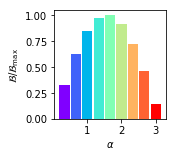

In [8]:
alphas = np.arange(1,10).astype('float')/3
fig, ax = plt.subplots(1,1,figsize=(2,2))
x = alphas
y = np.sin(x)
plt.bar(x, y/y.max(), 0.3, color=Rainbow(x), )
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathcal{B}/\mathcal{B}_{\rm max}$")


Here we compare the contribution of different regions

(0.0001, 10)

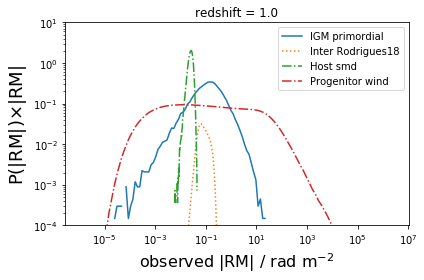

In [4]:
PlotContributions( redshift=1., measure='RM', **scenario0 )
plt.ylim(1e-4,10)

In [18]:
np.unique(FRBs['tele'])

array(['ASKAP', 'CHIME/FRB', 'DSA-10', 'GBT', 'Pushchino', 'UTMOST',
       'arecibo', 'parkes'],
      dtype='|S10')

Here we estimate the redshift based on DM and see how results can be improved by a) considering a reasonable prior on redshift, b) using $\tau$ also. The redhsift estimates are written into a latex tabular. 

full exemplary redshift estimate for the Spitler burst FRB121102

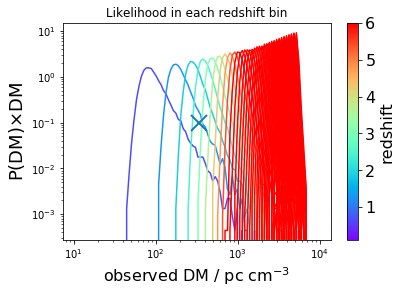

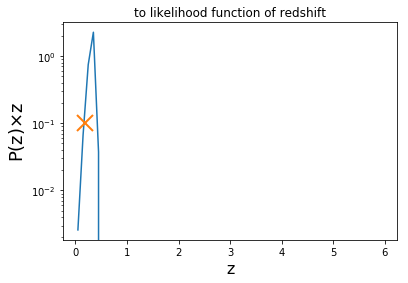

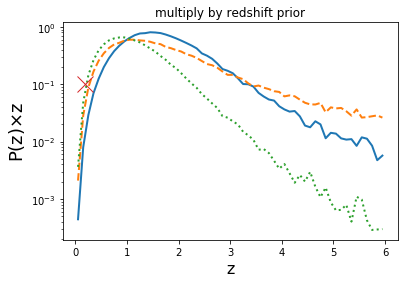

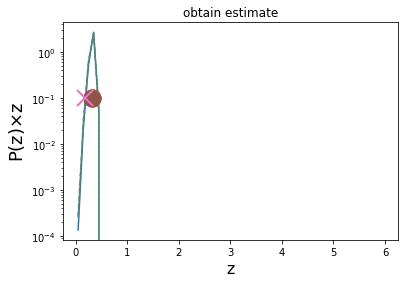

In [45]:
## Spitler burst,  Tendulkar et al. 2017
redshift_spitler = 0.19273
DM_total_spitler = 558 # pc cm^-3, total
DM_spitler = 340 # pc cm^-3, extragalactic = total-MW

telescope='Parkes'  #ARECIBO, actually  !!! PROVIDE prior vor ARECIBO



## P(DM|z) evolution with DM-marker
PlotLikelihoodEvolution( measure='DM', scenario=scenario_IGM )
plt.plot( DM_spitler, 1e-1, marker='x', markersize=16, markeredgewidth=2 )
plt.title('Likelihood in each redshift bin')
plt.show()

## P(z|DM) for flat prior with z-Marker
Ps, z = LikelihoodRedshift( DMs=[DM_spitler], population='flat', telescope='None', scenario=scenario_IGM )
PlotLikelihood(x=z, P=Ps[0], measure='z')
plt.xscale('linear')
plt.plot( redshift_spitler, 1e-1, marker='x', markersize=16, markeredgewidth=2 )
plt.title('to likelihood function of redshift')
plt.show()


## P(z|DM)*pi(z) with additional estimated z-Marker
fig, ax = plt.subplots()
for population, linestyle in zip( populations, linestyles_population ):
    P, z = GetLikelihood_Redshift( population=population, telescope=telescope)
    PlotLikelihood(x=z, P=P, measure='z', linestyle=linestyle, ax=ax, linewidth=2)
ax.set_title('multiply by redshift prior')
ax.set_xscale('linear')
ax.plot( redshift_spitler, 1e-1, marker='x', markersize=16 )
plt.show()


## P(z|DM)*pi(z) with additional estimated z-Marker
fig, ax = plt.subplots()
for population, linestyle in zip( populations, linestyles_population ):
    Ps, z = LikelihoodRedshift( DMs=[DM_spitler], population=population, telescope=telescope, scenario=scenario_IGM )
    PlotLikelihood(x=z, P=Ps[0], measure='z', linestyle=linestyle, ax=ax)
    avg, std = Likelihood2Expectation( x=z, P=Ps[0], log=False, density=True )
    ax.plot( avg, 1e-1, marker='o', markersize=16, markeredgewidth=2 )
    
ax.set_title('obtain estimate')
ax.set_xscale('linear')
ax.plot( redshift_spitler, 1e-1, marker='x', markersize=16, markeredgewidth=2 )
plt.show()


